Exercises 15.4, 15.5

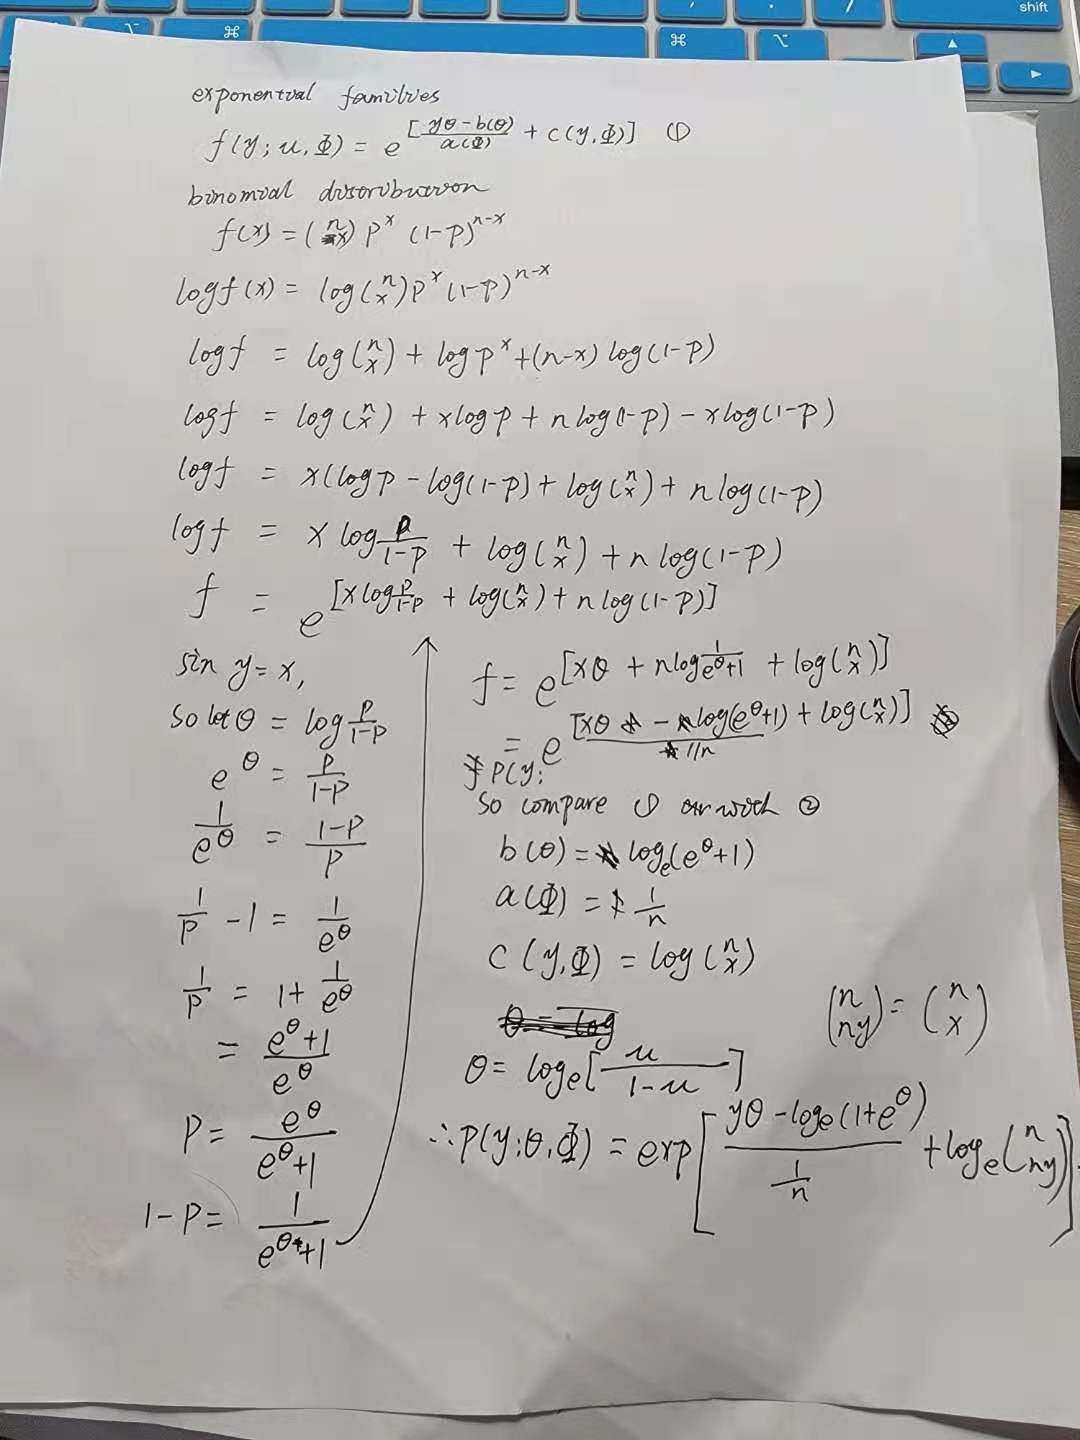

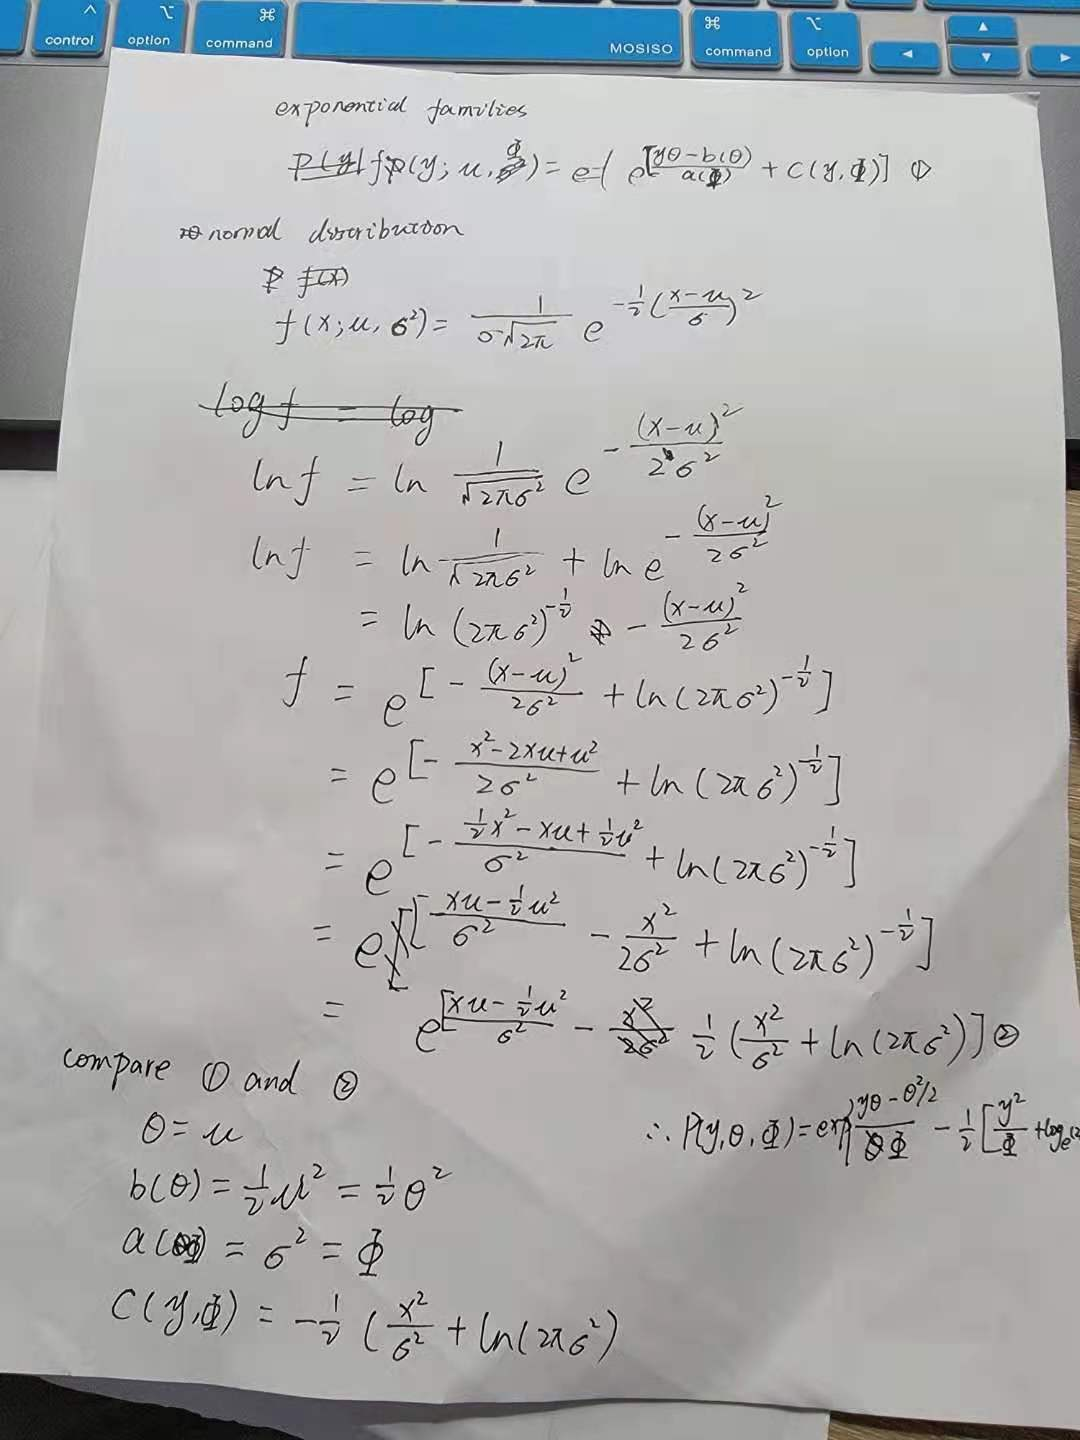

** [dsweet] (1/1) **

Exercise 14.1

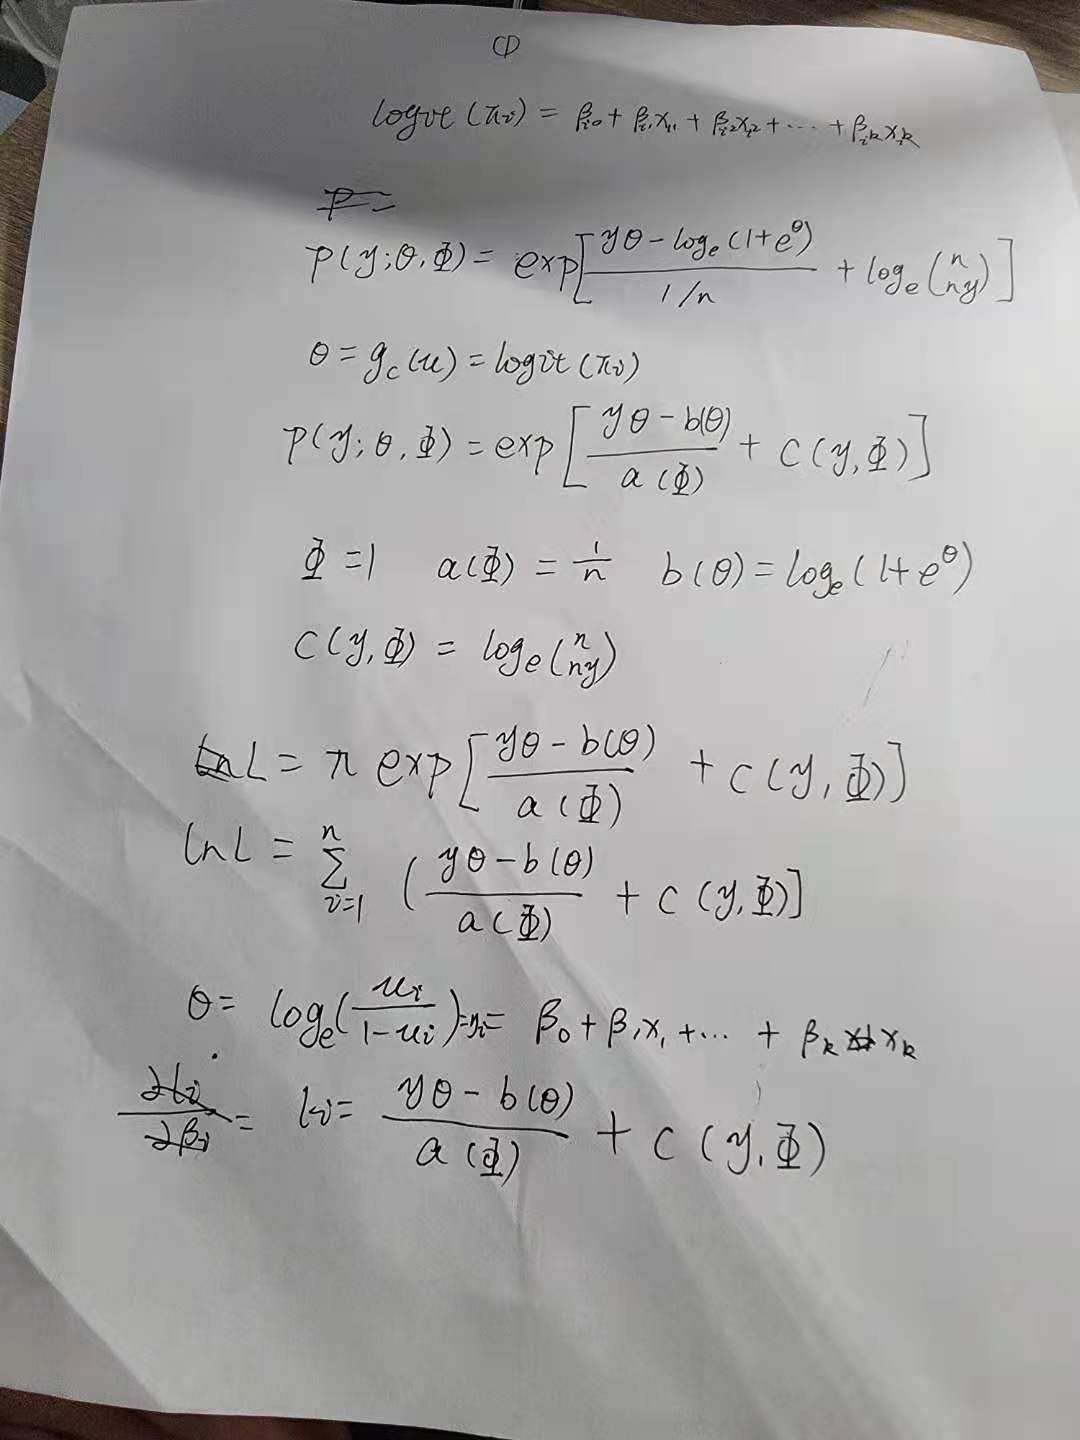

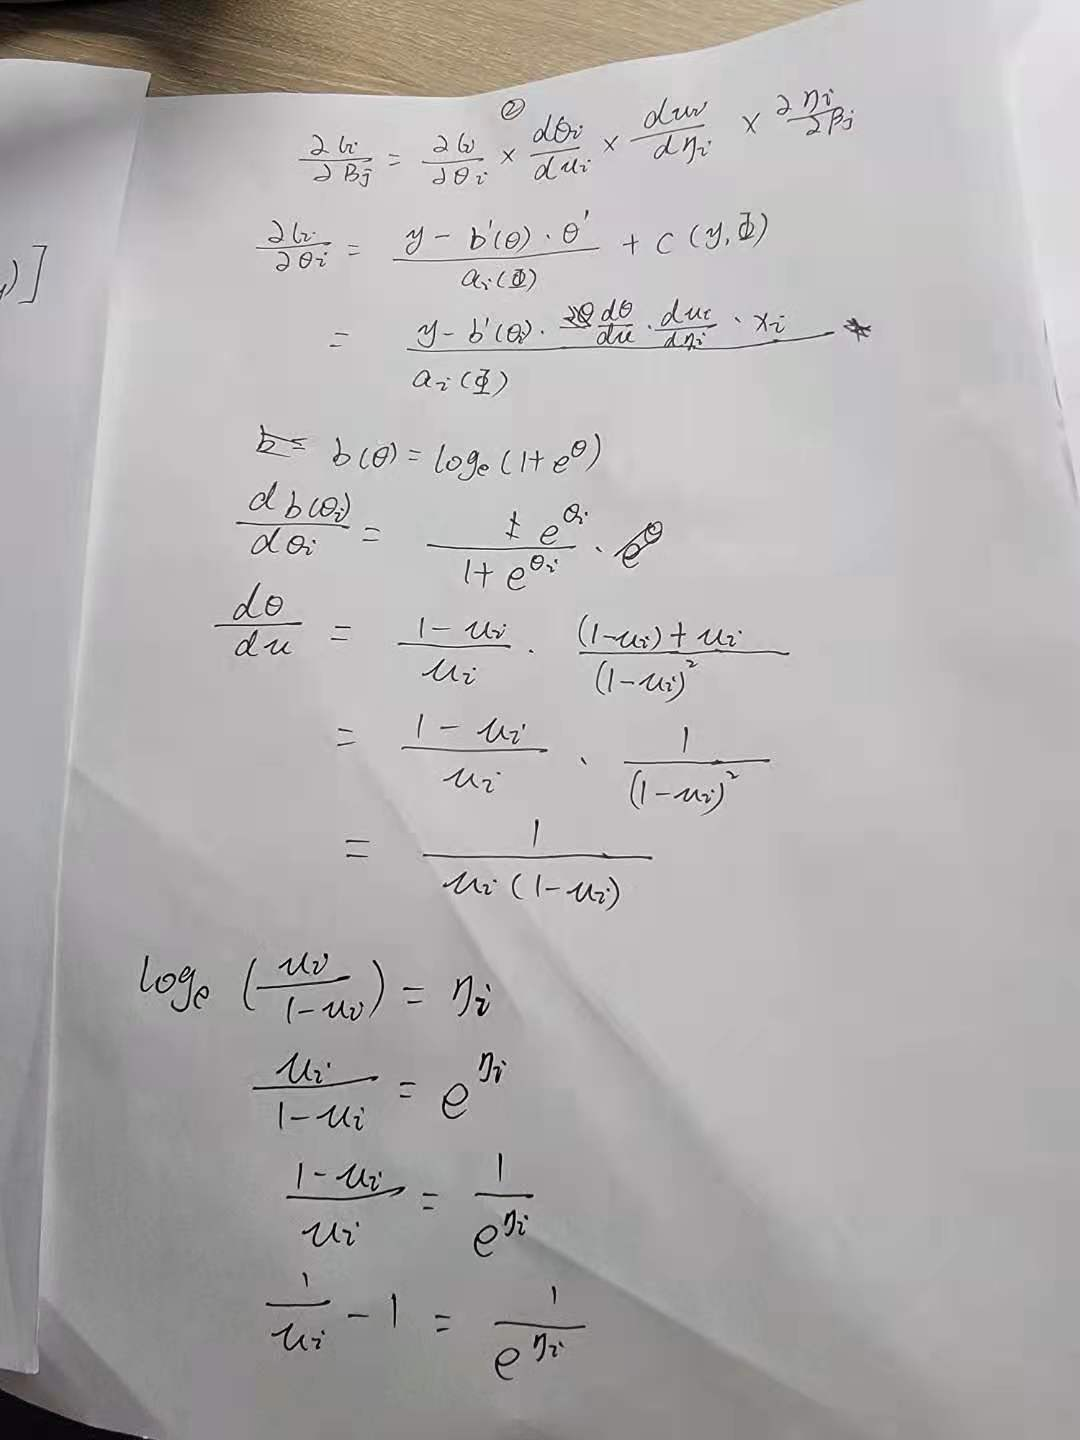

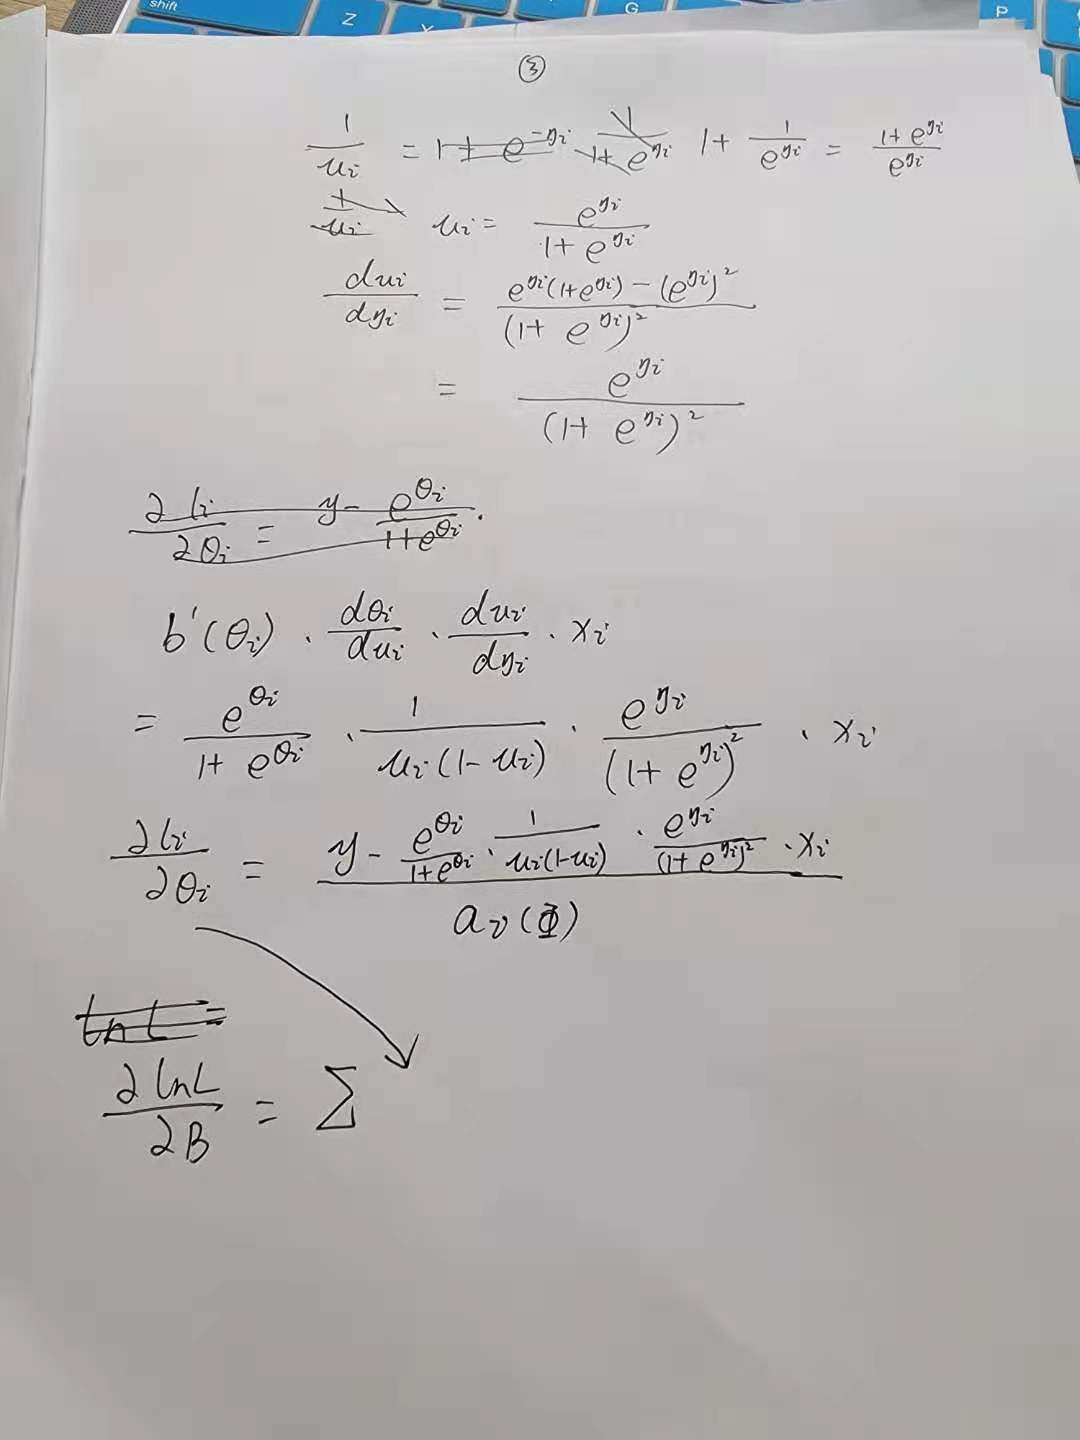

In [1090]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt

In [927]:
chile = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Chile.txt', sep='\t')

In [928]:
chile

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y
2699,M,15000,M,21.0,S,75000.0,0.18315,NaN


In [929]:
chile['vote'].value_counts()

N    889
Y    868
U    588
A    187
Name: vote, dtype: int64

In [930]:
chile1 = chile[chile.vote!='U' ]

In [931]:
chile2 = chile1[chile1.vote!='A' ]

In [932]:
chile2

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y
2699,M,15000,M,21.0,S,75000.0,0.18315,NaN


In [933]:
chile2[pd.isna(chile2['vote'])]

,region,population,sex,age,education,income,statusquo,vote
15,N,175000,M,36.0,PS,35000.0,1.49026,NaN
98,N,125000,F,34.0,P,2500.0,0.10807,NaN
113,N,250000,F,46.0,S,NaN,0.15489,NaN
118,N,250000,M,49.0,S,35000.0,-0.30605,NaN
185,N,45000,M,70.0,P,75000.0,0.01309,NaN
...,...,...,...,...,...,...,...,...
2660,M,25000,M,27.0,S,7500.0,-1.74401,NaN
2684,M,15000,F,55.0,P,15000.0,-0.58617,NaN
2685,M,15000,M,46.0,P,15000.0,1.43143,NaN
2690,M,15000,F,22.0,S,75000.0,0.87335,NaN


In [934]:
chile3 = chile2.dropna()
chile3

,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,Y
2,N,175000,M,29.0,PS,7500.0,-1.29617,N
3,N,175000,F,38.0,P,15000.0,1.23072,Y
4,N,175000,F,49.0,P,35000.0,-1.03163,N
5,N,175000,F,23.0,S,35000.0,-1.10496,N
...,...,...,...,...,...,...,...,...
2692,M,15000,F,21.0,S,35000.0,1.22231,Y
2696,M,15000,M,42.0,P,15000.0,-1.26247,N
2697,M,15000,F,28.0,P,15000.0,1.32950,Y
2698,M,15000,F,44.0,P,75000.0,1.42045,Y


In [935]:
chile3.vote = chile3.vote.map(dict(Y=1, N=0))
chile3

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,region,population,sex,age,education,income,statusquo,vote
1,N,175000,M,65.0,P,35000.0,1.00820,1
2,N,175000,M,29.0,PS,7500.0,-1.29617,0
3,N,175000,F,38.0,P,15000.0,1.23072,1
4,N,175000,F,49.0,P,35000.0,-1.03163,0
5,N,175000,F,23.0,S,35000.0,-1.10496,0
...,...,...,...,...,...,...,...,...
2692,M,15000,F,21.0,S,35000.0,1.22231,1
2696,M,15000,M,42.0,P,15000.0,-1.26247,0
2697,M,15000,F,28.0,P,15000.0,1.32950,1
2698,M,15000,F,44.0,P,75000.0,1.42045,1


In [936]:
chilex = chile3[['population', 'age', 'income', 'statusquo']]
chilex

,population,age,income,statusquo
1,175000,65.0,35000.0,1.00820
2,175000,29.0,7500.0,-1.29617
3,175000,38.0,15000.0,1.23072
4,175000,49.0,35000.0,-1.03163
5,175000,23.0,35000.0,-1.10496
...,...,...,...,...
2692,15000,21.0,35000.0,1.22231
2696,15000,42.0,15000.0,-1.26247
2697,15000,28.0,15000.0,1.32950
2698,15000,44.0,75000.0,1.42045


In [937]:
chilex.population.min()

3750

In [938]:
chilex.population = (chilex.population-chilex.population.min())/(chilex.population.max()-chilex.population.min())
chilex

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,population,age,income,statusquo
1,0.695431,65.0,35000.0,1.00820
2,0.695431,29.0,7500.0,-1.29617
3,0.695431,38.0,15000.0,1.23072
4,0.695431,49.0,35000.0,-1.03163
5,0.695431,23.0,35000.0,-1.10496
...,...,...,...,...
2692,0.045685,21.0,35000.0,1.22231
2696,0.045685,42.0,15000.0,-1.26247
2697,0.045685,28.0,15000.0,1.32950
2698,0.045685,44.0,75000.0,1.42045


In [939]:
chilex.age = (chilex.age-chilex.age.min())/(chilex.age.max()-chilex.age.min())
chilex

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,population,age,income,statusquo
1,0.695431,0.903846,35000.0,1.00820
2,0.695431,0.211538,7500.0,-1.29617
3,0.695431,0.384615,15000.0,1.23072
4,0.695431,0.596154,35000.0,-1.03163
5,0.695431,0.096154,35000.0,-1.10496
...,...,...,...,...
2692,0.045685,0.057692,35000.0,1.22231
2696,0.045685,0.461538,15000.0,-1.26247
2697,0.045685,0.192308,15000.0,1.32950
2698,0.045685,0.500000,75000.0,1.42045


In [940]:
chilex.income = (chilex.income-chilex.income.min())/(chilex.income.max()-chilex.income.min())
chilex

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,population,age,income,statusquo
1,0.695431,0.903846,0.164557,1.00820
2,0.695431,0.211538,0.025316,-1.29617
3,0.695431,0.384615,0.063291,1.23072
4,0.695431,0.596154,0.164557,-1.03163
5,0.695431,0.096154,0.164557,-1.10496
...,...,...,...,...
2692,0.045685,0.057692,0.164557,1.22231
2696,0.045685,0.461538,0.063291,-1.26247
2697,0.045685,0.192308,0.063291,1.32950
2698,0.045685,0.500000,0.367089,1.42045


In [941]:
chilex.statusquo = (chilex.statusquo-chilex.statusquo.min())/(chilex.statusquo.max()-chilex.statusquo.min())
chilex

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,population,age,income,statusquo
1,0.695431,0.903846,0.164557,0.794926
2,0.695431,0.211538,0.025316,0.124952
3,0.695431,0.384615,0.063291,0.859622
4,0.695431,0.596154,0.164557,0.201864
5,0.695431,0.096154,0.164557,0.180544
...,...,...,...,...
2692,0.045685,0.057692,0.164557,0.857177
2696,0.045685,0.461538,0.063291,0.134750
2697,0.045685,0.192308,0.063291,0.888341
2698,0.045685,0.500000,0.367089,0.914784


In [942]:
chiley = chile3['vote']
chiley

1       1
2       0
3       1
4       0
5       0
       ..
2692    1
2696    0
2697    1
2698    1
2700    1
Name: vote, Length: 1703, dtype: int64

In [943]:
def rec(n,m):
    if m == n:
        return 1
    elif m == 1:
        return n
    else:
        return rec(n-1,m-1)+rec(n-1,m)

In [944]:
n = len(chiley)
n

1703

In [945]:
chiley==1

1        True
2       False
3        True
4       False
5       False
        ...  
2692     True
2696    False
2697     True
2698     True
2700     True
Name: vote, Length: 1703, dtype: bool

In [946]:
m = len(chiley[chiley==1])
m

836

In [947]:
def alphalnl(x, y, b):#one time pass one observation
    thita = b[0]+np.dot(b[1:],x)
    yita = b[0]+np.dot(b[1:],x)
    mu = np.exp(yita)/(1+np.exp(yita))
    sum_ln = []
    for i in range(len(b)):
        if i==0:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))))
        else:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))*x[i-1]))
    return np.array(sum_ln)

In [948]:
def lnl1(x, y, b):#one time pass one observation
    thita = b[0]+np.dot(b[1:],x)
    sum_ln = np.exp(y*thita-np.log(1+(np.exp(thita))))
    return np.array(sum_ln)

In [949]:
def iwls(X,Y,B):
    alpha = 4
    sumln = np.linspace(0,0,len(X.columns)+1)
    ln = 0
    for i in range(len(chiley)):
        x = X.iloc[i,:]
        y = Y.iloc[i]
        ln += lnl1(x, y, B)
        sumln +=(alphalnl(x, y, B)) 
    B = B-alpha*(ln/sumln)
    return B

In [950]:
B = np.linspace(0.1,0.1,len(chilex.columns)+1)
B

array([0.1, 0.1, 0.1, 0.1, 0.1])

In [951]:
iwls(chilex,chiley,B)

array([  1.21100602,   2.32296784,   4.99710537, -25.1368252 ,
         3.08897321])

In [952]:
i = 0
firstb = []
lastb = []
while(True):
    B_new = iwls(chilex,chiley,B)
    if i==0:
        firstb = list(B_new)
    if np.abs(B-B_new).sum()<0.0001 or i==50:
        print(B)
        lastb = list(B_new)
        break
    B = B_new
    i+=1
    print(B)

[  1.21100602   2.32296784   4.99710537 -25.1368252    3.08897321]
[  1.21488794   2.32787435   5.0018923  -25.01046925   3.09396018]
[  1.21869372   2.33268074   5.00658398 -24.88715329   3.09884741]
[  1.22242631   2.33739097   5.01118414 -24.7667446    3.10363883]
[  1.2260885    2.34200879   5.0156963  -24.64911878   3.10833811]
[  1.22968291   2.34653773   5.02012378 -24.53415908   3.11294875]
[  1.23321205   2.35098113   5.0244697  -24.42175583   3.11747402]
[  1.23667824   2.35534213   5.02873702 -24.31180581   3.12191702]
[  1.24008373   2.3596237    5.03292854 -24.20421183   3.1262807 ]
[  1.24343061   2.36382867   5.03704692 -24.09888224   3.13056783]
[  1.24672088   2.36795971   5.04109466 -23.99573053   3.13478106]
[  1.24995644   2.37201934   5.04507416 -23.89467495   3.13892288]
[  1.25313909   2.37600998   5.04898768 -23.79563819   3.14299567]
[  1.25627054   2.3799339    5.05283737 -23.69854701   3.1470017 ]
[  1.25935243   2.38379328   5.05662529 -23.60333206   3.15094

In [953]:
lnl1(chilex.iloc[1,:], chiley[1], firstb)

array(0.97424786)

In [954]:
lnl1(chilex.iloc[1,:], chiley[1], lastb)

array(0.98282459)

In [955]:
print(f'{B} is the coefficients I found using MLE')

[  1.34465839   2.48969165   5.16115225 -21.09478727   3.259573  ] is the coefficients I found using MLE


In [956]:
B1 = B

### asymptotic standard errors.

In [957]:
seb = 0
for i in range(len(chiley)):
    x = chilex.iloc[i,:]
    seb += (x**2*np.exp(B[1:]*x)/((1+np.exp(B[1:]*x))**2))

seb**(-1/2)

population    0.117734
age           0.253028
income        1.141189
statusquo     0.154642
Name: 1, dtype: float64

In [958]:
B[1:]/seb

population     0.034510
age            0.330435
income       -27.471991
statusquo      0.077950
Name: 1, dtype: float64

##  chile only with constant

In [959]:
def alphalnl(x, y, b):#one time pass one observation
    thita = b[0]
    yita = b[0]
    mu = np.exp(yita)/(1+np.exp(yita))
    sum_ln = []
    for i in range(len(b)):
        if i==0:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))))
        else:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))*x[i-1]))
    return np.array(sum_ln)

In [960]:
def lnl(x, y, b):#one time pass one observation
    thita = b[0]
    sum_ln = np.exp(y*thita-np.log(1+(np.exp(thita))))
    return np.array(sum_ln)

In [961]:
def iwls(X,Y,B):
    alpha = 4
    sumln = np.linspace(0,0,len(X.columns)+1)
    ln = 0
    for i in range(len(chiley)):
        x = X.iloc[i,:]
        y = Y.iloc[i]
        ln += lnl(x, y, B)
        sumln +=(alphalnl(x, y, B)) 
    B = B-alpha*(ln/sumln)
    return B

In [962]:
B = np.linspace(0.1,0.1,len(chilex.columns)+1)
B

array([0.1, 0.1, 0.1, 0.1, 0.1])

In [963]:
i = 0
firstb = []
lastb = []
while(True):
    B_new = iwls(chilex,chiley,B)
    if i==0:
        firstb = list(B_new)
    if np.abs(B-B_new).sum()<0.0001 or i==50:
        print(B)
        lastb = list(B_new)
        break
    B = B_new
    i+=1
    print(B)

[  1.33782149   2.71027824   6.31854169 -15.89988995   3.65156143]
[  1.79587821   3.54159582   7.76795187 -10.17290558   4.68397719]
[ 2.09799017  4.07486682  8.65735427 -7.47050972  5.33661226]
[ 2.32568158  4.47156928  9.30604015 -5.67804069  5.81888466]
[ 2.50906801  4.78863066  9.81863866 -4.3307205   6.2028469 ]
[ 2.66287081  5.05318835 10.24318713 -3.24901726  6.52241156]
[ 2.79545035  5.28040786 10.60590603 -2.34432631  6.79637835]
[ 2.91203153  5.47966061 10.92273591 -1.56626899  7.03629944]
[ 3.01610623  5.65715721 11.20411463 -0.88340438  7.24979896]
[ 3.1101274   5.81723213 11.45725968 -0.2747662   7.44218086]
[ 3.195886    5.96303363 11.68737491  0.27433883  7.61728774]
[ 3.27473062  6.09692224 11.89833879  0.77461386  7.77799477]
[ 3.34770269  6.22071441 12.09312092  1.23410087  7.92651054]
[ 3.41562358  6.3358384  12.27404646  1.65899779  8.06456911]
[ 3.47915269  6.44343792 12.44297064  2.05418384  8.19355735]
[ 3.53882761  6.54444328 12.60139779  2.42356981  8.31460209

In [964]:
lnl(chilex.iloc[1,:], chiley[1], firstb)

array(0.79213146)

In [965]:
lnl(chilex.iloc[1,:], chiley[1], lastb)

array(0.99045051)

In [966]:
B2 = B

In [983]:
ls = 0
for i in range(len(chiley)):
    ls += np.abs(lnl1(chilex.iloc[i,:], chiley.iloc[i], B1))
ls

927.0956664285216

In [984]:
le = 0
for i in range(len(chiley)):
    le += np.abs(lnl(chilex.iloc[1,:], chiley.iloc[1], B2))
le

16.575140119525607

In [988]:
D = 2*(np.log(ls)-np.log(le))
D

8.048305541137935

### p value

since D>χ2 .5,1=3.84, we can know that 0.005<p value<0.002

### asymptotic standard errors

In [989]:
seb = 0
for i in range(len(chiley)):
    x = chilex.iloc[i,:]
    seb += (x**2*np.exp(B[1:]*x)/((1+np.exp(B[1:]*x))**2))

seb**(-1/2)

population    0.634573
age           0.992259
income        0.531179
statusquo     0.575368
Name: 1, dtype: float64

# Titanic

In [990]:
Titanic = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Titanic.txt', sep = '\t')

In [991]:
Titanic = Titanic.reset_index()

In [992]:
Titanic.columns = ['name', 'survived', 'age', 'passengerClass', 'sex']

In [993]:
Titanic['sex'].value_counts()

male      850
female    463
Name: sex, dtype: int64

In [994]:
Titanic['sex'].value_counts()

male      850
female    463
Name: sex, dtype: int64

In [995]:
Titanic = Titanic.drop(['name'], axis = 1)
Titanic

,survived,age,passengerClass,sex
0,yes,29.0000,1st,female
1,no,2.0000,1st,female
2,no,30.0000,1st,male
3,no,25.0000,1st,female
4,yes,0.9167,1st,male
...,...,...,...,...
1308,no,NaN,3rd,male
1309,no,NaN,3rd,male
1310,no,NaN,3rd,male
1311,no,NaN,3rd,female


In [996]:
Titanic = Titanic.dropna()
Titanic

,survived,age,passengerClass,sex
0,yes,29.0000,1st,female
1,no,2.0000,1st,female
2,no,30.0000,1st,male
3,no,25.0000,1st,female
4,yes,0.9167,1st,male
...,...,...,...,...
833,no,32.0000,3rd,male
835,no,20.0000,3rd,male
836,no,37.0000,3rd,male
837,no,28.0000,3rd,male


In [997]:
Titanic.sex = Titanic.sex.map(dict(male=1, female=2))
Titanic

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,survived,age,passengerClass,sex
0,yes,29.0000,1st,2
1,no,2.0000,1st,2
2,no,30.0000,1st,1
3,no,25.0000,1st,2
4,yes,0.9167,1st,1
...,...,...,...,...
833,no,32.0000,3rd,1
835,no,20.0000,3rd,1
836,no,37.0000,3rd,1
837,no,28.0000,3rd,1


In [998]:
Titanic.passengerClass = Titanic.passengerClass.map({'1st':1, '2nd':2, '3rd':3})
Titanic

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,survived,age,passengerClass,sex
0,yes,29.0000,1,2
1,no,2.0000,1,2
2,no,30.0000,1,1
3,no,25.0000,1,2
4,yes,0.9167,1,1
...,...,...,...,...
833,no,32.0000,3,1
835,no,20.0000,3,1
836,no,37.0000,3,1
837,no,28.0000,3,1


In [999]:
Titanic.survived = Titanic.survived.map({'yes':1, 'no':0})
Titanic

/opt/anaconda3/envs/sp/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,survived,age,passengerClass,sex
0,1,29.0000,1,2
1,0,2.0000,1,2
2,0,30.0000,1,1
3,0,25.0000,1,2
4,1,0.9167,1,1
...,...,...,...,...
833,0,32.0000,3,1
835,0,20.0000,3,1
836,0,37.0000,3,1
837,0,28.0000,3,1


In [1000]:
Titanicx = Titanic[['age', 'passengerClass', 'sex']]
Titanicx

,age,passengerClass,sex
0,29.0000,1,2
1,2.0000,1,2
2,30.0000,1,1
3,25.0000,1,2
4,0.9167,1,1
...,...,...,...
833,32.0000,3,1
835,20.0000,3,1
836,37.0000,3,1
837,28.0000,3,1


In [1011]:
Titanicy = Titanic['survived']
Titanicy

0      1
1      0
2      0
3      0
4      1
      ..
833    0
835    0
836    0
837    0
838    0
Name: survived, Length: 633, dtype: int64

In [1012]:
def alphalnl(x, y, b):#one time pass one observation
    thita = b[0]+np.dot(b[1:],x)
    yita = b[0]+np.dot(b[1:],x)
    mu = np.exp(yita)/(1+np.exp(yita))
    sum_ln = []
    for i in range(len(b)):
        if i==0:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))))
        else:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))*x[i-1]))
    return np.array(sum_ln)

In [1013]:
def lnl1(x, y, b):#one time pass one observation
    thita = b[0]+np.dot(b[1:],x)
    sum_ln = np.exp(y*thita-np.log(1+(np.exp(thita))))
    return np.array(sum_ln)

In [1014]:
def iwls(X,Y,B):
    alpha = 0.0001
    sumln = np.linspace(0,0,len(X.columns)+1)
    ln = 0
    for i in range(len(Titanicy)):
        x = X.iloc[i,:]
        y = Y.iloc[i]
        ln += lnl1(x, y, B)
        sumln +=(alphalnl(x, y, B)) 
    B = B-alpha*(ln/sumln)
    return B

In [1015]:
B = np.linspace(0.1,0.1,len(Titanicx.columns)+1)
B

array([0.1, 0.1, 0.1, 0.1])

In [1016]:
iwls(Titanicx,Titanicy,B)

array([0.10000042, 0.10000001, 0.10000029, 0.10000031])

In [1017]:
i = 0
firstb = []
lastb = []
while(True):
    B_new = iwls(Titanicx,Titanicy,B)
    if i==0:
        firstb = list(B_new)
    if np.abs(B-B_new).sum()<0.000001 or i==100:
        lastb = list(B_new)
        print(B)
        break
    B = B_new
    i+=1
    print(B)

[0.10000042 0.10000001 0.10000029 0.10000031]
[0.10000084 0.10000002 0.10000058 0.10000062]
[0.10000127 0.10000002 0.10000086 0.10000093]
[0.10000169 0.10000003 0.10000115 0.10000123]
[0.10000211 0.10000004 0.10000144 0.10000154]
[0.10000253 0.10000005 0.10000173 0.10000185]
[0.10000295 0.10000006 0.10000201 0.10000216]
[0.10000338 0.10000006 0.1000023  0.10000247]
[0.1000038  0.10000007 0.10000259 0.10000278]
[0.10000422 0.10000008 0.10000288 0.10000309]
[0.10000464 0.10000009 0.10000316 0.1000034 ]
[0.10000507 0.1000001  0.10000345 0.1000037 ]
[0.10000549 0.1000001  0.10000374 0.10000401]
[0.10000591 0.10000011 0.10000403 0.10000432]
[0.10000633 0.10000012 0.10000431 0.10000463]
[0.10000675 0.10000013 0.1000046  0.10000494]
[0.10000718 0.10000014 0.10000489 0.10000525]
[0.1000076  0.10000014 0.10000518 0.10000556]
[0.10000802 0.10000015 0.10000546 0.10000587]
[0.10000844 0.10000016 0.10000575 0.10000617]
[0.10000886 0.10000017 0.10000604 0.10000648]
[0.10000929 0.10000018 0.10000633 

In [1018]:
B3 = B

In [1019]:
lnl1(Titanicx.iloc[1,:], Titanicy[1], firstb)

array(0.35434339)

In [1020]:
lnl1(Titanicx.iloc[1,:], Titanicy[1], lastb)

array(0.35431266)

### asymptotic standard errors.

In [1021]:
seb = 0
for i in range(len(Titanicy)):
    x = Titanicx.iloc[i,:]
    seb += (x**2*np.exp(B[1:]*x)/((1+np.exp(B[1:]*x))**2))

seb**(-1/2)

age               0.007141
passengerClass    0.037925
sex               0.054406
Name: 0, dtype: float64

## Titanic with only constant

In [1022]:
def alphalnl(x, y, b):#one time pass one observation
    thita = b[0]
    yita = b[0]
    mu = np.exp(yita)/(1+np.exp(yita))
    sum_ln = []
    for i in range(len(b)):
        if i==0:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))))
        else:
            sum_ln.append(y-((np.exp(thita)/(1+np.exp(thita)))*(1/(mu*(1-mu)))*x[i-1]))
    return np.array(sum_ln)

In [1023]:
def lnl(x, y, b):#one time pass one observation
    thita = b[0]+np.dot(b[1:],x)
    sum_ln = np.exp(y*thita-np.log(1+(np.exp(thita))))
    return np.array(sum_ln)

In [1024]:
def iwls(X,Y,B):
    alpha = 0.0001
    sumln = np.linspace(0,0,len(X.columns)+1)
    ln = 0
    for i in range(len(Titanicy)):
        x = X.iloc[i,:]
        y = Y.iloc[i]
        ln += lnl(x, y, B)
        sumln +=(alphalnl(x, y, B)) 
    B = B-alpha*(ln/sumln)
    return B

In [1025]:
B = np.linspace(0.1,0.1,len(Titanicx.columns)+1)
B

array([0.1, 0.1, 0.1, 0.1])

In [1026]:
i = 0
firstb = []
lastb = []
while(True):
    B_new = iwls(Titanicx,Titanicy,B)
    if i==0:
        firstb = list(B_new)
    if np.abs(B-B_new).sum()<0.000001 or i==100:
        lastb = list(B_new)
        print(B)
        break
    B = B_new
    i+=1
    print(B)

[0.10002639 0.10000067 0.10001197 0.10001776]
[0.10005279 0.10000134 0.10002394 0.10003551]
[0.10007918 0.10000202 0.10003591 0.10005327]
[0.10010557 0.10000269 0.10004788 0.10007102]
[0.10013197 0.10000336 0.10005984 0.10008878]
[0.10015836 0.10000403 0.10007181 0.10010653]
[0.10018475 0.10000471 0.10008378 0.10012429]
[0.10021114 0.10000538 0.10009575 0.10014204]
[0.10023753 0.10000605 0.10010772 0.1001598 ]
[0.10026392 0.10000672 0.10011968 0.10017755]
[0.10029031 0.10000739 0.10013165 0.1001953 ]
[0.1003167  0.10000807 0.10014362 0.10021306]
[0.10034309 0.10000874 0.10015559 0.10023081]
[0.10036947 0.10000941 0.10016755 0.10024856]
[0.10039586 0.10001008 0.10017952 0.10026631]
[0.10042225 0.10001075 0.10019149 0.10028406]
[0.10044864 0.10001143 0.10020345 0.10030182]
[0.10047502 0.1000121  0.10021542 0.10031957]
[0.10050141 0.10001277 0.10022738 0.10033732]
[0.10052779 0.10001344 0.10023935 0.10035507]
[0.10055418 0.10001412 0.10025132 0.10037282]
[0.10058056 0.10001479 0.10026328 

In [1027]:
lnl(Titanicx.iloc[1,:], Titanicy[1], firstb)

array(0.35432648)

In [1028]:
lnl(Titanicx.iloc[1,:], Titanicy[1], lastb)

array(0.35260891)

In [1029]:
B4 = B

In [1030]:
ls = 0
for i in range(len(Titanicy)):
    ls += np.abs(lnl1(Titanicx.iloc[i,:], Titanicy.iloc[i], B3))
ls

277.5525951296632

In [1031]:
le = 0
for i in range(len(chiley)):
    le += np.abs(lnl(Titanicx.iloc[1,:], Titanicy.iloc[1], B4))
le

600.5221757831275

In [1032]:
D = 2*(np.log(ls)-np.log(le))
D

-1.5435782449526432

### p value

since D<χ2 .5,1=3.84,even than D<0.0000393 we can know that p value>0.995.

# Exercise 15.1

In [1153]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.formula.api import poisson

In [1048]:
long = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-2E/datasets/Long.txt', sep = '\t')
long

,fem ment phd mar kid5 art
0,1 0 8 1.38 1 2 3
1,2 0 7 4.29 0 0 0
2,3 0 47 3.85 0 0 4
3,4 0 19 3.59 1 1 1
4,5 0 0 1.81 1 0 1
...,...
910,911 1 0 2.12 1 0 1
911,912 1 5 3.75 0 0 2
912,913 1 0 0.76 0 0 0
913,914 1 7 2.25 0 0 1


In [1105]:
fem = []
ment = []
phd = []
mar = []
kid5 = []
art = []
pattern = r'[0-9\.]+'
for i in range(len(long)):
    a = re.findall(pattern, str(long.iloc[i,:].replace(' ','  ')))
    fem.append(a[2])
    ment.append(a[3])
    phd.append(a[4])
    mar.append(a[5])
    kid5.append(a[6])
    art.append(a[7])
data = {'fem':fem, 'ment':ment, 'phd':phd, 'mar':mar, 'kid5':kid5, 'art':art}
longg = pd.DataFrame(data, dtype=float)
longg

,fem,ment,phd,mar,kid5,art
0,0.0,8.0,1.38,1.0,2.0,3.0
1,0.0,7.0,4.29,0.0,0.0,0.0
2,0.0,47.0,3.85,0.0,0.0,4.0
3,0.0,19.0,3.59,1.0,1.0,1.0
4,0.0,0.0,1.81,1.0,0.0,1.0
...,...,...,...,...,...,...
910,1.0,0.0,2.12,1.0,0.0,1.0
911,1.0,5.0,3.75,0.0,0.0,2.0
912,1.0,0.0,0.76,0.0,0.0,0.0
913,1.0,7.0,2.25,0.0,0.0,1.0


In [1106]:
longg.dropna()

,fem,ment,phd,mar,kid5,art
0,0.0,8.0,1.38,1.0,2.0,3.0
1,0.0,7.0,4.29,0.0,0.0,0.0
2,0.0,47.0,3.85,0.0,0.0,4.0
3,0.0,19.0,3.59,1.0,1.0,1.0
4,0.0,0.0,1.81,1.0,0.0,1.0
...,...,...,...,...,...,...
910,1.0,0.0,2.12,1.0,0.0,1.0
911,1.0,5.0,3.75,0.0,0.0,2.0
912,1.0,0.0,0.76,0.0,0.0,0.0
913,1.0,7.0,2.25,0.0,0.0,1.0


In [1140]:
longg['art'].value_counts()

0.0     275
1.0     246
2.0     178
3.0      84
4.0      67
5.0      27
6.0      17
7.0      12
9.0       2
12.0      2
10.0      1
19.0      1
8.0       1
11.0      1
16.0      1
Name: art, dtype: int64

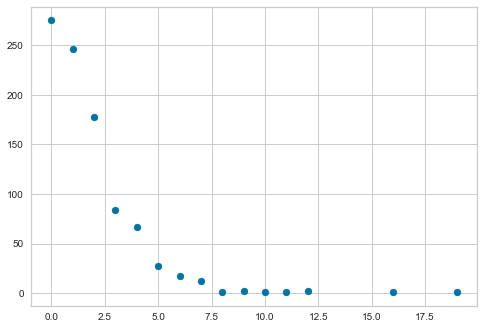

In [1141]:
plt.scatter(longg['art'].value_counts().index, longg['art'].value_counts())

In [1142]:
longg1 = longg.copy()
longg1

,fem,ment,phd,mar,kid5,art
0,0.0,8.0,1.38,1.0,2.0,3.0
1,0.0,7.0,4.29,0.0,0.0,0.0
2,0.0,47.0,3.85,0.0,0.0,4.0
3,0.0,19.0,3.59,1.0,1.0,1.0
4,0.0,0.0,1.81,1.0,0.0,1.0
...,...,...,...,...,...,...
910,1.0,0.0,2.12,1.0,0.0,1.0
911,1.0,5.0,3.75,0.0,0.0,2.0
912,1.0,0.0,0.76,0.0,0.0,0.0
913,1.0,7.0,2.25,0.0,0.0,1.0


In [1143]:
X_train, X_test, y_train, y_test = train_test_split(longg1[['fem','ment','phd','mar','kid5']], longg1['art'], test_size=0.2, random_state=42)

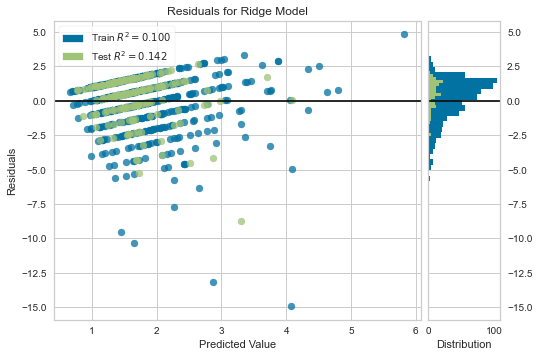

In [1144]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

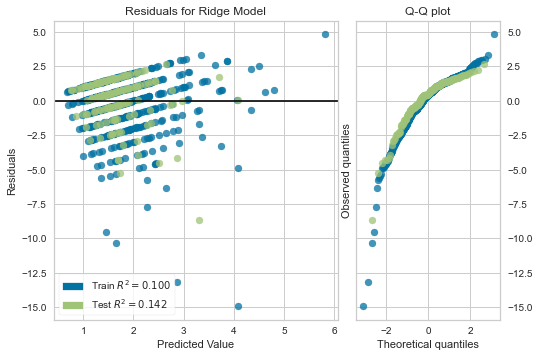

In [1145]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

We can see that the point aren't randomly dispersed around the horizontal axis and this model is a linear model so that it can't be promised to use in the linear model. We can use the nonlinear model to fit it.

In [1146]:
1/(longg1['art']+1)

0      0.250000
1      1.000000
2      0.200000
3      0.500000
4      0.500000
         ...   
910    0.500000
911    0.333333
912    1.000000
913    0.500000
914    0.500000
Name: art, Length: 915, dtype: float64

In [1147]:
X_train, X_test, y_train, y_test = train_test_split(longg1[['fem','ment','phd','mar','kid5']], 1/(1+np.exp(-longg1['art'])), test_size=0.2, random_state=42)

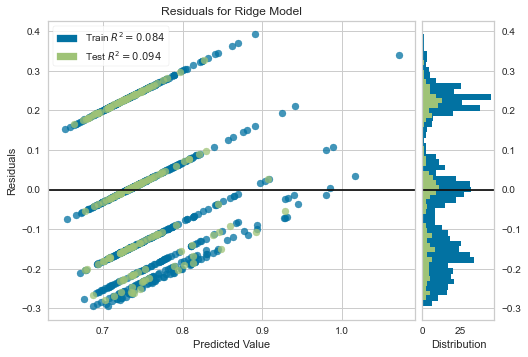

In [1148]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

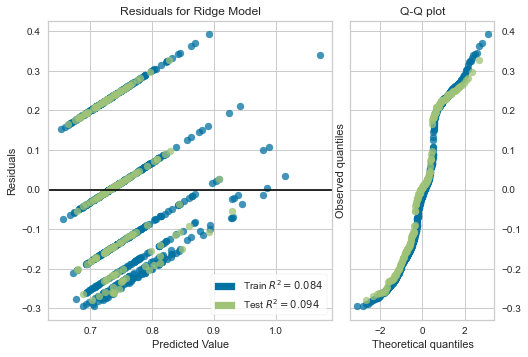

In [1149]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [1150]:
X_train, X_test, y_train, y_test = train_test_split(longg1[['fem','ment','phd','mar','kid5']], np.log(longg1['art']+1), test_size=0.2, random_state=42)

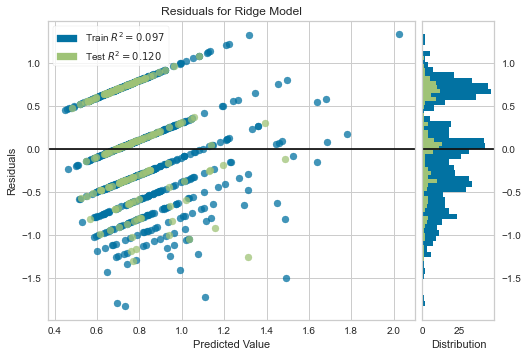

In [1151]:
model = Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show() 

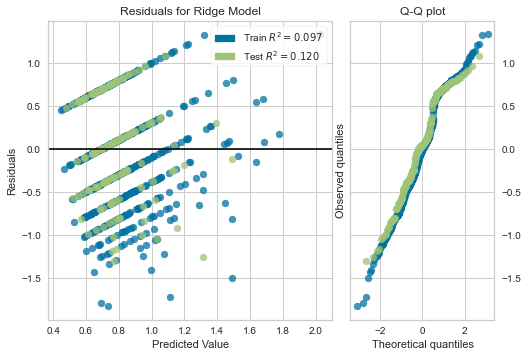

In [1152]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Compare to several transforms, I think log transforms is best because it's straighter in the Q-Q plot and means it more close to normal distrubution.

# (b)

In [1154]:
model = sm.GLM(longg1['art'],longg1[['fem','ment','phd','mar','kid5']],family=sm.families.Poisson())

In [1155]:
results = model.fit()

In [1156]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      910
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1655.4
Date:                Tue, 20 Jul 2021   Deviance:                       1643.0
Time:                        05:10:16   Pearson chi2:                 1.73e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fem           -0.1703      0.052     -3.294      0.001      -0.272      -0.069
ment           0.0259      0.002     12.875      0.000       0.022       0.030
phd            0.0759      0.016      4.862      0.000       0.045       0.106
mar            0.2357      0.056      4.226      0.000       0.126       0.345
kid5          -0.1800      0.040     -4.489      0.000      -0.259      -0.101
==============================================================================
"""

In [1159]:
results.pvalues<0.05

fem     True
ment    True
phd     True
mar     True
kid5    True
dtype: bool

In [1161]:
model = sm.GLM(np.log(longg1['art']+1),longg1[['fem','ment','phd','mar','kid5']],family=sm.families.Poisson())

In [1162]:
results = model.fit()

In [1163]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    art   No. Observations:                  915
Model:                            GLM   Df Residuals:                      910
Model Family:                 Poisson   Df Model:                            4
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -947.37
Date:                Tue, 20 Jul 2021   Deviance:                       583.59
Time:                        05:14:17   Pearson chi2:                     427.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
fem           -0.2245      0.073     -3.056      0.002      -0.368      -0.080
ment           0.0183      0.003      5.710      0.000       0.012       0.025
phd           -0.0709      0.023     -3.148      0.002      -0.115      -0.027
mar           -0.0049      0.079     -0.062      0.951      -0.160       0.150
kid5          -0.1414      0.058     -2.436      0.015      -0.255      -0.028
==============================================================================
"""

In [1164]:
results.pvalues<0.05

fem      True
ment     True
phd      True
mar     False
kid5     True
dtype: bool

Before transform, all of the values are less than 0.05. But after the transform, there is one value greater than 0.05. It means that marriage doesn't have an obvious effect on art. From the first model, ment, phd,mar are positive correspond relationship to the art and the other 2 are negative correspond to art. It's a little similar to our real life. Actually, we don't need to use the link function again for the later model.